# Практическая работа «Кластеризация. Метод k-средних»

## Цель практической работы

- Научиться строить модель кластеризации на реальных данных.

## Что входит в работу


- Загрузить данные и провести разведочный анализ.
- Предположить оптимальное количество кластеров.
- Построить модель кластеризации с помощью  библиотеки scikit-learn.
- Вычислить оптимальное количество кластеров.
- Интерпретировать результаты.

## Что оценивается

*   Выполнены все этапы задания.
*   Сделаны выводы по результатам.

## Как отправить работу на проверку

Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задачи. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (с расширением .ipynb) или ссылку на него.


## Задача

Пусть имеется набор данных `Mall_Customers.csv` о покупателях супермаркета:

* CustomerID — идентификатор покупателя;
* Genre — пол;
* Age — возраст;
* Annual Income (k$) — годовой доход покупателя в тыс. долл.;
* Spending Score (1–100) — рейтинг трат покупателя.

Решите задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы.

### Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других обнаруженных свойствах данных.

In [27]:
import pandas as pd
import seaborn as sns


df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [28]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [29]:
df = df.drop('CustomerID', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [30]:
df.corr(numeric_only='True')

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


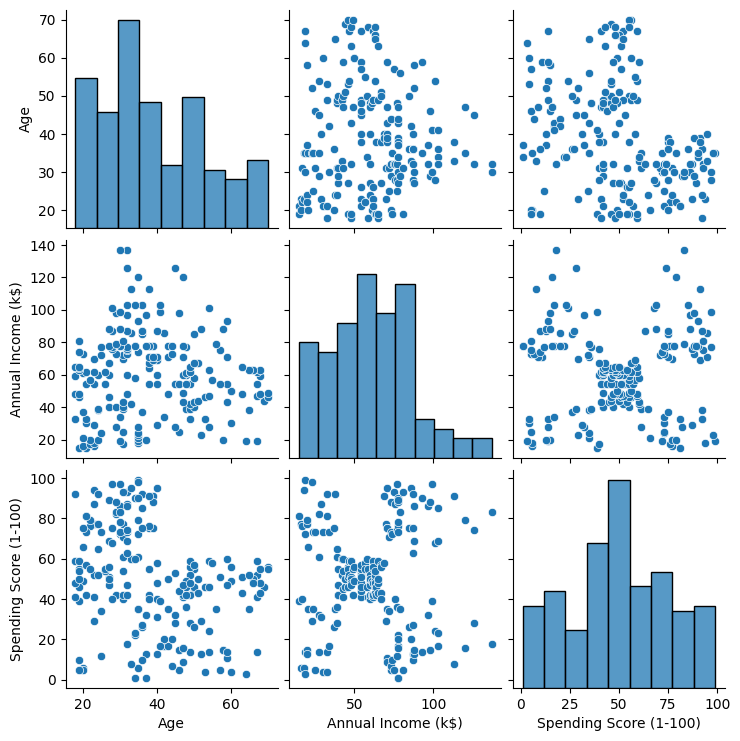

In [31]:
sns.pairplot(df)

### Задание 2

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Поскольку данных может быть настолько много, что построение одной модели будет занимать несколько часов, важно примерно оценить количество кластеров до запуска обучения модели.

На основе результатов разведочного анализа данных предположите, какое количество кластеров будет оптимальным, и аргументируйте предположение.

Судя по графикам, предположительно оптимальным будет 5 кластеров, так как они явно выделяются на графиках зависимости ежегодного дохода от рейтинга трат.

### Задание 3

Преобразуйте категориальный признак Genre в численный. Аргументируйте выбор метода кодирования признака.

In [32]:
df['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

In [33]:
# Так как признак имеет два уникальных значения, то кодируем как 0 и 1
df['Genre'] = df['Genre'].apply(lambda x: 1 if x == 'Male' else 0)

### Задание 4

Постройте модель кластеризации с помощью метода k-средних. Определите оптимальное количество кластеров с помощью метода локтя.

<Axes: >

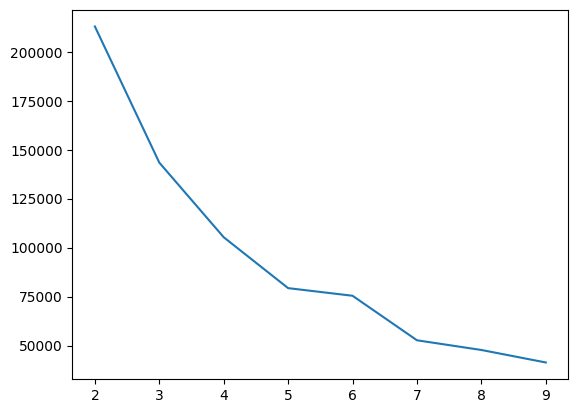

In [34]:
from sklearn.cluster import KMeans


n_clusters = list(range(2, 10))
metrics = []
for k in n_clusters:
    km = KMeans(k)
    km.fit(df)
    metrics.append(km.inertia_)

sns.lineplot(x=n_clusters, y=metrics)

### Задание 5

Постройте финальную модель кластеризации с количеством кластеров, опредёленным в предыдущем задании.

In [43]:
from sklearn.cluster import KMeans


km = KMeans(5)
df['cluster'] = km.fit_predict(df.drop('cluster', axis=1))
df['cluster']

0      0
1      4
2      0
3      4
4      0
      ..
195    3
196    2
197    3
198    2
199    3
Name: cluster, Length: 200, dtype: int32

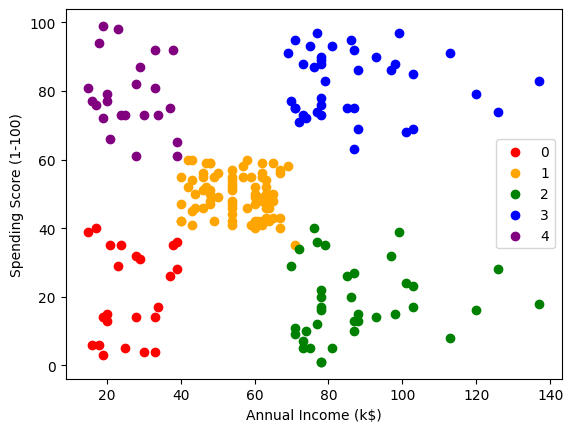

In [45]:
import matplotlib.pyplot as plt


colors = ['red', 'orange', 'green', 'blue', 'purple']
vars = ['Annual Income (k$)', 'Spending Score (1-100)']
for cluster in sorted(df['cluster'].unique()):
    data = df[df['cluster'] == cluster][[*vars]]
    plt.scatter(data[vars[0]], data[vars[1]], color=colors[cluster], label=cluster)

plt.xlabel(vars[0])
plt.ylabel(vars[1])
plt.legend();

### Задание 6 (выполните по желанию)

При работе с данными важно не только качество моделей машинного обучения, но и интерпретация полученных результатов и представление их в виде, понятном пользователям и заказчикам.

После построения модели кластеризации вы разбили покупателей на группы. Теперь важно интерпретировать эти группы, то есть создать профиль группы. 

В качестве профиля группы часто используют её типичного представителя. В кластерах типичным представителем можно назвать центроиду кластера. В sklearn получить список центроид можно с помощью атрибута `cluster_centers_` у объекта класса KMeans (этот атрибут возвращает матрицу с размерностями (количество кластеров, количество признаков), подробнее об этом [в материале](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)). 

Получите центроиды кластеров, преобразуйте их к датафрейму, опишите типичного представителя каждой группы и чем группы отличаются друг от друга. При описании и сравнении используйте методы визуализации.

In [46]:
centroids = pd.DataFrame(km.cluster_centers_, columns=km.feature_names_in_)
centroids

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.391304,45.217391,26.304348,20.913043
1,0.423077,43.282051,55.025641,49.692308
2,0.513514,40.324324,87.432432,18.189189
3,0.461538,32.692308,86.538462,82.128205
4,0.391304,25.521739,26.304348,78.565217


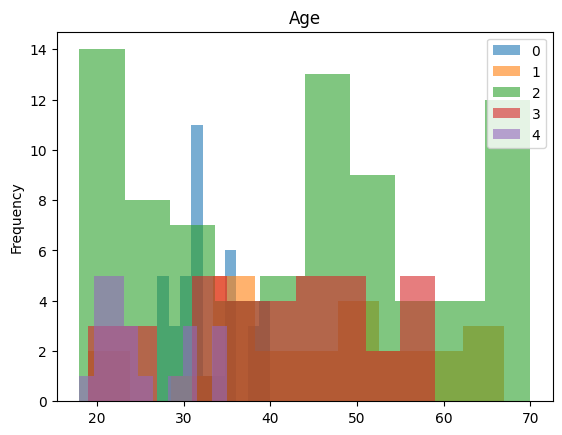

In [21]:
# import matplotlib.pyplot as plt


colors = ['red', 'orange', 'green', 'blue', 'purple']
vars = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
# for cluster in df['cluster'].unique():
#     data = df[df['cluster'] == cluster][[*vars]]
#     plt.bar(data[vars[0]], data[vars[1]], color=colors[cluster])

df.groupby('cluster')['Age'].plot.hist(legend=True, alpha=0.6, title='Age');

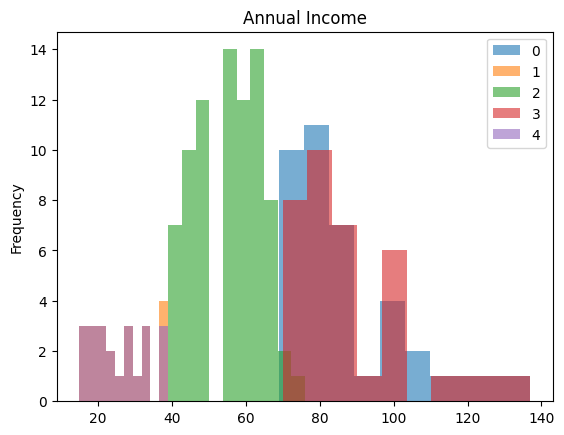

In [22]:
df.groupby('cluster')['Annual Income (k$)'].plot.hist(legend=True, alpha=0.6, title='Annual Income');

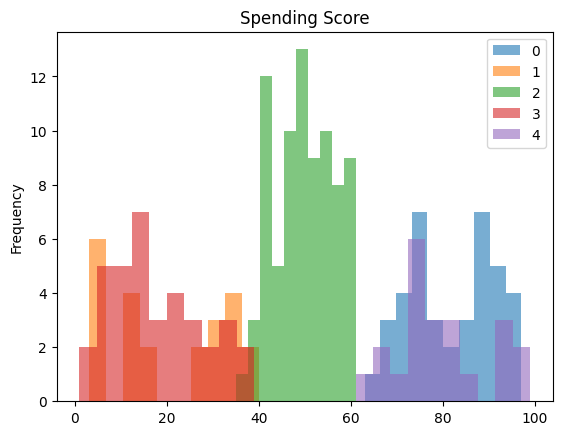

In [23]:
df.groupby('cluster')['Spending Score (1-100)'].plot.hist(legend=True, alpha=0.6, title='Spending Score');

По доходам и тратам данные разделились на 5 явно выделенных кластеров: 

0 - низкие доходы и низкие траты;

1 - средние доходы и средние траты;

2 - высокий доход и низкие траты;

3 - высокие доходы и высокие траты;

4 - низкий доход и высокие траты.

По возрасту у кластеры 0-2 не отличаются значимо (примерно 40-45 лет), для кластера 3 средний возраст 32, а для 4 - 25 лет.

По полу во всех кластерах преобладет доля женщин, кроме кластера 3, в котором немного более половины мужчин.